# Classification: SVM


In [2]:
import pandas as pd
data = pd.read_csv('telemarketing_train_preprocess.csv')

In [3]:
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,target
0,1.444850,-0.746982,-0.571300,-3.969061,1.366417,-1.706389,-2.254135,1.860592,-1.400757,-1.031304,...,0,0,0,0,0,1,0,0,1,1
1,1.082169,0.100012,-0.571300,0.252494,-0.378985,-1.706389,-0.979221,-0.075950,-1.187102,-1.031304,...,0,0,1,0,0,0,0,1,0,1
2,0.447476,-0.363501,0.974844,0.252494,-0.378985,0.910934,-0.174453,0.892321,0.854483,0.901546,...,0,0,0,0,0,1,0,1,0,0
3,-0.731238,-0.200104,-0.184764,0.252494,-0.378985,0.728330,0.745760,0.830517,0.795410,0.429467,...,0,0,0,0,1,0,0,1,0,0
4,-0.731238,2.884420,-0.184764,0.252494,-0.378985,-0.002086,-0.582693,-0.323168,0.333873,0.490545,...,0,1,0,0,0,0,0,1,0,0


target
0    11552
1     3448
dtype: int64


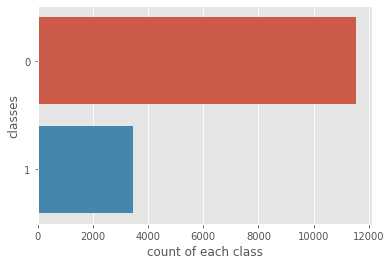

In [4]:
#Print class freq. through pandas 
print(data.groupby('target').size())

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=data.target ,data=data)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [5]:
#gives information about the data types,columns, null value counts, memory usage etc
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            15000 non-null  float64
 1   duration                       15000 non-null  float64
 2   campaign                       15000 non-null  float64
 3   pdays                          15000 non-null  float64
 4   previous                       15000 non-null  float64
 5   emp.var.rate                   15000 non-null  float64
 6   cons.price.idx                 15000 non-null  float64
 7   cons.conf.idx                  15000 non-null  float64
 8   euribor3m                      15000 non-null  float64
 9   nr.employed                    15000 non-null  float64
 10  marital_divorced               15000 non-null  int64  
 11  marital_married                15000 non-null  int64  
 12  marital_single                 15000 non-null 

In [6]:
#basic statistic details about the data
data.describe(include="all")

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,target
count,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,2.237766e-16,5.155506e-17,-1.194137e-16,1.510525e-15,3.569663e-16,-5.268378e-16,2.312233e-14,-2.741011e-16,-4.016047e-17,-1.417787e-14,...,0.019600,0.184000,0.203467,0.218533,0.198333,0.195667,0.106733,0.838400,0.054867,0.229867
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,...,0.138626,0.387497,0.402590,0.413265,0.398758,0.396726,0.308784,0.368096,0.227727,0.420761
min,-2.091293e+00,-9.570631e-01,-5.713005e-01,-3.986032e+00,-3.789850e-01,-2.010729e+00,-2.254135e+00,-2.136100e+00,-1.536016e+00,-2.464081e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.312382e-01,-6.169318e-01,-5.713005e-01,2.524942e-01,-3.789850e-01,-1.036841e+00,-7.918325e-01,-4.673781e-01,-1.168884e+00,-7.399131e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,-1.872161e-01,-3.268198e-01,-1.847643e-01,2.524942e-01,-3.789850e-01,7.283300e-01,-1.744530e-01,-2.819646e-01,7.948584e-01,4.294675e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6.288169e-01,2.500697e-01,2.017719e-01,2.524942e-01,-3.789850e-01,9.109339e-01,7.457603e-01,8.305167e-01,8.528266e-01,9.015460e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,5.253004e+00,1.540926e+01,1.566322e+01,2.524942e-01,1.009343e+01,9.109339e-01,2.039078e+00,2.787660e+00,8.992012e-01,9.015460e-01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#Separate X and y (explanatory variables and target variable)
X = data.iloc[:,0:-1]
column_names = list(X) 
y = data.iloc[:,-1] 

#X.head()
#y.head()

In [8]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y,  #X_scaled
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape)

(10500, 51)


## SVM

![SVM](SVM.png)

We aim to resolve the following optimization problem:

\begin{align}\begin{aligned}\min_ {w, b, d} \frac{1}{2} ||w||^2 + C \sum_{i=1}^{m} d_i\\\begin{split}\textrm {subject to } & y_i (w^T \phi (x_i) - b) \geq 1 - d_i,\\
& d_i \geq 0\end{split}\end{aligned}\end{align}

where $\phi$ is the kernel map that can be chosen as 
 - linear: $\langle x, x'\rangle$
 - polynomial: $(\gamma \langle x, x'\rangle + r)^d$ where $\gamma,\, d ,\, r$ are specified by keyword gamma, degree and coef0 respectively.
 - radial basis function rbf: $\exp(-\gamma \|x-x'\|^2)$
 - neural networks (sigmoid): $\tanh(\gamma \langle x,x'\rangle + r)$

In [9]:
from sklearn.svm import SVC

model = SVC(kernel='linear',C=1, class_weight="balanced")


# C : Penalty parameter C of the error term.
# kernel : kernel type. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).
# degree : Degree of the polynomial kernel function (‘poly’)
# gamma : Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
# coef0 : Independent term in kernel function.
# tol : Tolerance for stopping criterion.
# class_weight : Set the parameter C of class i to class_weight[i]*C for SVC.

In [10]:
model.fit(X_train, y_train)
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 1])

In [11]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear'], "C":[0.1,100],"gamma":[1]}

In [12]:
#DEFINE YOUR GRIDSEARCH 
'''
GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)
If refit=True the model is retrained on the whole training set with the best found params
'''
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'accuracy', verbose=50, n_jobs=-1, refit=True)

In [13]:
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    2.7s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    3.3s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:   28.7s remaining:   14.4s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   31.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   31.5s finished


In [14]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.873905 using {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
0.873905 (0.004234) with: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
0.872571 (0.002333) with: {'C': 100, 'gamma': 1, 'kernel': 'linear'}


In [15]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

In [16]:
#This is your prediction on the TEST SET
#y_pred

In [17]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn.metrics import f1_score
print('***RESULTS ON TEST SET***')
print("f1_score: ", f1_score(y_test, y_pred))

***RESULTS ON TEST SET***
f1_score:  0.696149843912591


In [18]:
#PRINT SOME FURTHER METRICS
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3466
           1       0.75      0.65      0.70      1034

    accuracy                           0.87      4500
   macro avg       0.83      0.79      0.81      4500
weighted avg       0.87      0.87      0.87      4500



In [19]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[3247  219]
 [ 365  669]]


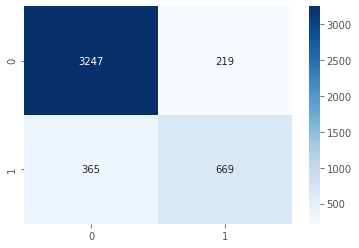

In [20]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format


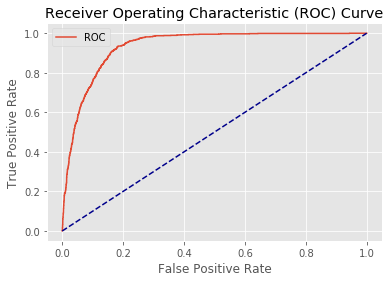

AUC: 0.93


In [21]:
from sklearn import metrics

model = SVC(C=0.1, gamma=0.0001, kernel='linear',probability=True)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)